# O desafio tem como proposta verificar as habilidades em tais ocasiões:

Neste exercício serão avaliadas as seguintes habilidades:
* Capacidade de criação de instrumento de coleta;
* Habilidade em aplicar tratamento aos dados;
* Otimização na construção do código;
* Capacidade de gerar visualizações para os dados.

Com esse intuito criei o código para atender a esses pontos e de forma fácil de entender e ter futuras.



<h3> 1º Acessando e identificando os produtos do site </h3>

Acessando o site eu escolhi a **categoria** no qual iria fazer a coleta e análise, neste caso escolhei a **Lazer e Utilidades.**

E fui verificando onde estaria a **classe principal** com o link dos produtos para identificar os produtos posteriormente.


<h3> 2º Criando o código para realizar a raspagem </h3>

Com as informações necessárias dos links dos produtos utilizei a **biblioteca beatifulsoup** para realizar a raspagem e criar a tabela com as informações.

1º Criei funções para **realizar a coleta de cada informação**;

2º Criei um código para **iterar sobre os links da coleta e criar a tabela**.

**Criando funções para a extração das informações dos produtos, assim é melhor para trarar eventuais erros que possam aparecer**

In [1]:
# Função para extrair os nomes do produto
def get_title(soup):

    try:
        # Outer Tag Object
        title = soup.find("h1", attrs={"class":'product-name'})

        # Inner NavigatableString Object
        title_value = title.text

        # Title as a string value
        title_string = title_value.strip()

    except AttributeError:
        title_string = ""

    return title_string

# Extrai os rótulos do produto
def get_info(soup):

    try:
        # Outer Tag Object
        info = soup.find("div", attrs={"class":"product-main-info"})

        # Inner NavigatableString Object
        info_value = info.text

        # Title as a string value
        info_string = info_value.strip().split()

    except AttributeError:
        info_string = ""

    return info_string

# Extrai os preços dos produtos
def get_price(soup):

    try:
        # Outer Tag Object
        price = soup.find("span", attrs={"data-app":"product.price"})

        # Inner NavigatableString Object
        price_value = price.text

        # Title as a string value
        price_string = price_value.strip()

    except AttributeError:
        price_string = ""

    return price_string

<h3> 3º Realizando a raspagem e transformando os dados em tabela </h3>

Utilizar POO nesse casopermite que você agrupe funcionalidades relacionadas em uma única classe (neste caso, a classe Scraper). Isso torna o código mais fácil de entender e manter, pois você sabe exatamente onde procurar as funções de raspagem.

In [8]:
import time
import requests
from bs4 import BeautifulSoup
import datetime

# Classe Principal Scraper
class Scraper:
    # Medodo com as informações do número de páginas, headers e o dataframe
    def __init__(self, num_pages):
        self.num_pages = num_pages
        self.HEADERS = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36', 'Accept-Language': 'pt-BR, pt;q=0.9'})
        self.dados = {"Nome_Produto":[],"Codigo_Produto":[],"Preço_Coleta":[],"Url_Coleta":[],"Data_coleta":[]}

    # Metodo para realizar a raspagem para cada link
    def scrape(self):
        for i in range(1, self.num_pages + 1):
            url = f'https://www.marchio.com/loja/catalogo.php?loja=1243088&categoria=333&pg={i}'
            webpage = requests.get(url, headers=self.HEADERS)
            soup = BeautifulSoup(webpage.content, "html.parser")
            # link principal da página
            links = soup.find_all("a", attrs={'class':'product-info'})
            # Criando uma lista de link para acessar cada produto
            link_list = [link['href'] for link in links]
            # Percorrendo a lista de link com o método scrape_product
            for link in link_list:
                self.scrape_product(link)

    # Método para preencher o dataframe com cada informação dos links
    def scrape_product(self, url):
        new_webpage = requests.get(url, headers=self.HEADERS)
        new_soup = BeautifulSoup(new_webpage.content, "html.parser")
        data_coleta = datetime.datetime.now().strftime("%d/%m/%Y, %H:%M:%S")
        # Criando o dataframe com as informações coletadas
        self.dados["Nome_Produto"].append(get_title(new_soup))
        self.dados["Codigo_Produto"].append(get_info(new_soup))
        self.dados["Preço_Coleta"].append(get_price(new_soup))
        self.dados["Url_Coleta"].append(url)
        self.dados["Data_coleta"].append(data_coleta)

    # Método para printar as informações
    def print_data(self):
      for prod, info in self.dados.items():
          print(f"{prod}: {info}\n")


# Uso
scraper = Scraper(num_pages=2)
# contar o tempo de execução
start_time = time.time()
scraper.scrape()

print('*----------------------------Apresentando os resultados----------------*')

scraper.print_data()
end_time = time.time()
# tempo de execução
elapsed_time = end_time - start_time

print('*----------------------------------------------------------------------*')
print(f"A raspagem levou {round(elapsed_time,2)} segundos para ser concluída.")


*----------------------------Apresentando os resultados----------------*
Nome_Produto: ['CHURRASQUEIRA 4 ESPETOS  TIJ. PINT. VERMELHA', 'Barraca iglu azul 4 pessoas', 'Barraca 2 pessoas camping', 'Abridor garrafa/furador lata preto - ya18', 'PISCINA FEIJAO AZUL SEM TAMPA 500L', 'PISCINA FEIJAO AZUL SEM TAMPA 300L', 'CHURRASQUEIRA ARAGUAIA', 'Barraca 3 pessoas camping', 'CHURRASQUEIRA ELETRICA GRILL 220V', 'Barraca 4 pessoas camping', 'BOMBA ELETRICA P/ GALAO DE AGUA RECARREGAVEL', 'Lavadora alta pressao hlx 110 vm 1400 w 220 v', 'MANGUEIRA PL JARDIM KING 30M AZUL LISA', 'CHURRASQUEIRA LISA PREDIAL 65CM 4 ESPETOS - WORLD']

Codigo_Produto: [['Ref:', '114238', 'Marca:', 'WORLD', 'GRILL', 'Modelo:', 'CH6501'], ['Ref:', '101053', 'Marca:', 'MOR*', 'Modelo:', '009035'], ['Ref:', '112910', 'Marca:', 'ANTARES', 'Modelo:', '17010101001'], ['Ref:', '107049', 'Marca:', 'YAZI', 'Modelo:', '3780'], ['Ref:', '118583', 'Marca:', 'AFORT', 'Modelo:', 'P1010003'], ['Ref:', '118585', 'Marca:', 'AFORT', 

<h3> 4º Criando análises com o dataframe </h3>

Com o dataframe criado pela coleta podemos criar algumas análises e visualizações sobre o que foi coletado com a biblioteca Pandas.

Como por exemplo, produtos mais caros e mais baratos.

In [5]:
import pandas as pd

dados = scraper.dados
df = pd.DataFrame.from_dict(dados)

In [4]:
df.head(5)

,Nome_Produto,Codigo_Produto,Preço_Coleta,Url_Coleta,Data_coleta
0,CHURRASQUEIRA 4 ESPETOS TIJ. PINT. VERMELHA,"[Ref:, 114238, Marca:, WORLD, GRILL, Modelo:, ...","1.176,39",https://www.marchio.com/churrasqueira-4-espeto...,"15/12/2023, 21:55:51"
1,Barraca iglu azul 4 pessoas,"[Ref:, 101053, Marca:, MOR*, Modelo:, 009035]","273,01",https://www.marchio.com/barraca-iglu-azul-4-pe...,"15/12/2023, 21:55:52"
2,Barraca 2 pessoas camping,"[Ref:, 112910, Marca:, ANTARES, Modelo:, 17010...","176,78",https://www.marchio.com/barraca-2-pessoas-camping,"15/12/2023, 21:55:54"
3,Abridor garrafa/furador lata preto - ya18,"[Ref:, 107049, Marca:, YAZI, Modelo:, 3780]","5,90",https://www.marchio.com/abridor-garrafafurador...,"15/12/2023, 21:55:55"
4,PISCINA FEIJAO AZUL SEM TAMPA 500L,"[Ref:, 118583, Marca:, AFORT, Modelo:, P1010003]","436,41",https://www.marchio.com/piscina-feijao-azul-se...,"15/12/2023, 21:55:56"


**Produtos mais caros**

In [ ]:
# Pegando as colunas Nome e preço e ordenando pelo maior preço ao menor
produtos_mais_caros = df[["Nome_Produto","Preço_Coleta"]].sort_values(by="Preço_Coleta",ascending=False)
produtos_mais_caros

,Nome_Produto,Preço_Coleta
13,CHURRASQUEIRA LISA PREDIAL 65CM 4 ESPETOS - WORLD,1277.87
0,CHURRASQUEIRA 4 ESPETOS TIJ. PINT. VERMELHA,1176.39
11,Lavadora alta pressao hlx 110 vm 1400 w 220 v,467.80
4,PISCINA FEIJAO AZUL SEM TAMPA 500L,436.41
5,PISCINA FEIJAO AZUL SEM TAMPA 300L,411.27
6,CHURRASQUEIRA ARAGUAIA,328.77
8,CHURRASQUEIRA ELETRICA GRILL 220V,325.14
1,Barraca iglu azul 4 pessoas,273.01
9,Barraca 4 pessoas camping,253.73
7,Barraca 3 pessoas camping,215.20


**Visualizando com um gráfico**

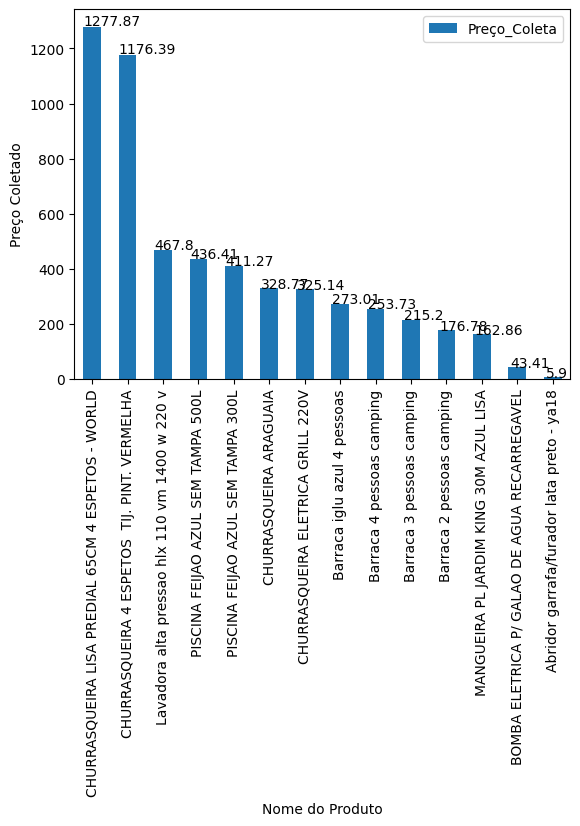

In [ ]:
import matplotlib.pyplot as plt

ax = produtos_mais_caros.plot(x="Nome_Produto", y="Preço_Coleta", kind="bar")
plt.xlabel('Nome do Produto')
plt.ylabel('Preço Coletado')

# Adiciona rótulos em cada barra
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()


**Analisando os nomes do produtos**

In [ ]:
df[["Nome_Produto"]].value_counts()

Nome_Produto                                     
Abridor garrafa/furador lata preto - ya18            1
BOMBA ELETRICA P/ GALAO DE AGUA RECARREGAVEL         1
Barraca 2 pessoas camping                            1
Barraca 3 pessoas camping                            1
Barraca 4 pessoas camping                            1
Barraca iglu azul 4 pessoas                          1
CHURRASQUEIRA 4 ESPETOS  TIJ. PINT. VERMELHA         1
CHURRASQUEIRA ARAGUAIA                               1
CHURRASQUEIRA ELETRICA GRILL 220V                    1
CHURRASQUEIRA LISA PREDIAL 65CM 4 ESPETOS - WORLD    1
Lavadora alta pressao hlx 110 vm 1400 w 220 v        1
MANGUEIRA PL JARDIM KING 30M AZUL LISA               1
PISCINA FEIJAO AZUL SEM TAMPA 300L                   1
PISCINA FEIJAO AZUL SEM TAMPA 500L                   1
dtype: int64

**Avaliando a quantidade dos produtos que mais aparecem**

In [ ]:
# Quantos produtos como barraca tem ?
df['Nome_Produto'].str.contains('Barraca').sum()

4

In [ ]:
# Quantos produtos como churrasqueira tem ?
df['Nome_Produto'].str.contains('CHURRASQUEIRA').sum()

4

In [ ]:
# Quantos produtos como piscina tem ?
df['Nome_Produto'].str.contains('PISCINA').sum()

2

**Finalizando a análise e coleta, algumas possiveis melhorias que podem ser feitas futuramente são:**

1. **Tratamento de erros robusto**: Adicionar mais tratamento de erros pode ajudar seu código a lidar melhor com páginas da web que não estão formatadas como esperado.

2. **Velocidade e eficiência**: Se o número de páginas que você está raspando for grande, podemos considerar técnicas para acelerar sua raspagem, como fazer solicitações assíncronas ou usar uma biblioteca como Scrapy.

3. **Raspagem de imagens**: Se as imagens forem importantes para sua análise, podemos considerar adicionar essa funcionalidade.

4. **Armazenamento de dados**: Se você planeja coletar muitos dados ao longo do tempo, podemos considerar o uso de um banco de dados para armazenar seus dados.

5. **Agendamento de raspagem**: Se você quiser coletar dados regularmente, podemos considerar o uso de uma ferramenta de agendamento para executar seu script de raspagem em intervalos regulares.

Agradeço a oportunidade do desafio!😊